# Global Shark Attack File Analysis

The Shark Research Institute (SRI) maintains a log of shark attacks worldwide, the Global Shark Attack File (GSAF). It is continually updated as new incidents occur, and was started in 1992 by the SRI. The purpose of the GSAF is to "use forensic analysis to demonstrate and emphasize the likelihood of shark/human interactions in comparison to the myriad dangers that we face in our daily lives. With a better understanding of these interactions we can minimize the possibility of being injured by a shark, and shift the discussion from fear to conservation of all shark species worldwide", per the SRI/GSAF website https://www.sharks.org/global-shark-attack-file)

The current log file, in Excel form, can be downloaded from the "chronoligically" link at the site below:

https://www.sharks.org/global-shark-attack-file

The goal of this project to gain an understanding of the data, clean the data, and then analyze shark incidents worldwide. Some of the areas of interest in this project are type of incident (provoked or unprovoked), fatalities, the shark species involved and activity of the human.

In [1]:
# Import the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data and general cleaning

The shark attack data file viewed as an Excel file in Google Sheets, and was downloaded as a CSV file. We'll read it into pandas and start exploring the data.

In [2]:
gsaf = pd.read_csv('/home/ken/my_datasets/GSAF/GSAF_25MAY2021.csv')
gsaf.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,...,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,...,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN,NaN
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,...,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN,NaN


In [3]:
gsaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6460 non-null   object 
 1   Date                    6461 non-null   object 
 2   Year                    6459 non-null   float64
 3   Type                    6457 non-null   object 
 4   Country                 6411 non-null   object 
 5   Area                    5999 non-null   object 
 6   Location                5917 non-null   object 
 7   Activity                5910 non-null   object 
 8   Name                    6247 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3591 non-null   object 
 11  Injury                  6433 non-null   object 
 12  Fatal (Y/N)             5915 non-null   object 
 13  Time                    3070 non-null   object 
 14  Species                 3538 non-null   

There are 6262 entries in the dataset, and most columns do have some null/missing data. Not too surprising for this dataset, since there are often unknown/unverifiable circumstances regarding shark attacks. We'll start by removing several un-needed columns and then reviewing the Case Numbers, converting the year column to integer, type of attack, and country.

In [4]:
# Dropping columns that will not be used in this analysis
gsaf.drop(columns = ['href formula','href', 'Case Number.1', 'Case Number.2', 'original order','Unnamed: 22',
                     'Unnamed: 23'], inplace=True)
gsaf.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Unnamed: 9', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Investigator or Source', 'pdf'],
      dtype='object')

In [5]:
# There are a couple entries with missing Case Numbers, so let's isolate them and take a look.
missing_cases = gsaf[gsaf['Case Number'].isnull() == True]
print(missing_cases)

     Case Number                  Date    Year      Type Country     Area  \
4087         NaN                   NaN     NaN       NaN     NaN      NaN   
5646         NaN  Reported 06-Sep-1905  1905.0  Provoked     USA  Florida   

                          Location Activity         Name Unnamed: 9  Age  \
4087                           NaN      NaN          NaN        NaN  NaN   
5646  Fort Pierce, St Lucie County  Fishing  David Curry        NaN  NaN   

                                                 Injury Fatal (Y/N) Time  \
4087                                                NaN         NaN  NaN   
5646  Lacerations to leg from hooked shark PROVOKED ...           N  NaN   

     Species           Investigator or Source  pdf  
4087      NaN                             NaN  NaN  
5646      NaN  Muncie Evening Press, 8/6/1913  NaN  


In [6]:
# Remove those two rows, since there doesn't appear to be much data to work with
gsaf = gsaf[gsaf['Case Number'].isnull() == False]
print(gsaf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6460 entries, 0 to 6461
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6460 non-null   object 
 1   Date                    6460 non-null   object 
 2   Year                    6458 non-null   float64
 3   Type                    6456 non-null   object 
 4   Country                 6410 non-null   object 
 5   Area                    5998 non-null   object 
 6   Location                5916 non-null   object 
 7   Activity                5909 non-null   object 
 8   Name                    6246 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3591 non-null   object 
 11  Injury                  6432 non-null   object 
 12  Fatal (Y/N)             5914 non-null   object 
 13  Time                    3070 non-null   object 
 14  Species                 3538 non-null   

In [7]:
# Evaluate the Year column
gsaf['Year'].value_counts()

2015.0    143
2017.0    138
2016.0    130
2011.0    128
2014.0    127
         ... 
1787.0      1
1786.0      1
1785.0      1
1784.0      1
1815.0      1
Name: Year, Length: 252, dtype: int64

Upon further review of the Year column, there are some year ranges included and somewhat questionable entries. There are year values in the 1700s & 1800s, and even earlier. We will reduce the scope of the entries to 1900 to present day, based on the Year column, in order to keep the data to more of a modern era. 

In [8]:
# Limiting the dataset from 1900 to the present & convert to integer
gsaf = gsaf[gsaf['Year'] >= 1900]
gsaf['Year'] = gsaf['Year'].astype(int)
print(gsaf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5718 entries, 0 to 5721
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             5718 non-null   object
 1   Date                    5718 non-null   object
 2   Year                    5718 non-null   int64 
 3   Type                    5715 non-null   object
 4   Country                 5694 non-null   object
 5   Area                    5398 non-null   object
 6   Location                5338 non-null   object
 7   Activity                5276 non-null   object
 8   Name                    5547 non-null   object
 9   Unnamed: 9              28 non-null     object
 10  Age                     3498 non-null   object
 11  Injury                  5699 non-null   object
 12  Fatal (Y/N)             5248 non-null   object
 13  Time                    2971 non-null   object
 14  Species                 3354 non-null   object
 15  Inve

The dataset is now at 5718 entries, and we'll look at the Type column which has 3 null values.

In [9]:
# Taking a look at the values for the Type column
gsaf['Type'].value_counts()

Unprovoked             4163
Provoked                557
Invalid                 481
Sea Disaster            186
Watercraft              113
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64

In [10]:
# Identify the rows with nulls in the "Type" column
missing_type = gsaf[gsaf['Type'].isnull() == True]
print(missing_type)

       Case Number                  Date  Year Type    Country          Area  \
239   2017.09.15.a           15-Sep-2017  2017  NaN      SAMOA  Upolu Island   
537     2015.07.27           27-Jul-2015  2015  NaN  AUSTRALIA      Victoria   
5025  1936.09.11.R  Reported 11-Sep-1936  1936  NaN    VIETNAM           NaN   

              Location           Activity    Name Unnamed: 9  Age  \
239          Nofoali’i            Fishing    male        NaN  NaN   
537   Tyrendarra Beach            Surfing    male        NaN   40   
5025            Saigon  Wreck of a sampam  8 crew        NaN  NaN   

                          Injury Fatal (Y/N)   Time Species   \
239   Injuries to hands and legs           N  Night      NaN   
537               Injury to hand         NaN    NaN      NaN   
5025                       FATAL           Y    NaN      NaN   

                Investigator or Source  pdf  
239          Samoa Observer, 9/16/2017  NaN  
537                                NaN  NaN  
5025  L

### Cleaning up the type of shark attacks

First of all, what is an unprovoked attack versus a provoked attack? What about some of the other categories? 

Per the shark attack file website, https://www.sharkattackfile.net/incidentlog.htm, a provoked incident is "one in which the shark was speared, hooked, captured or in which a human drew "first blood", Essentially, an unprovoked incident is one where the victim was not interacting with or actively pursuing a shark, such as a surfer being bit while sitting on a surfboard. A provoked incident is one where the victim was purposefully interacting with a shark, such as shark fishing or divers trying to touch a shark. 
 
Without specific metadata available from the GSAF website, it's unclear what some of these 'Types' refer to. For example, 'Invalid'? Not sure what that means, along with 'Boatomg', 'Unverified' and others. For this analysis, we will combine the following Types: 'Boat', 'Boating', 'Boatomg', and 'Watercraft'. They will all be changed to 'Boat'. Likewise, the 3 null values, plus 'Questionable', 'Unverified' and 'Under Investigation' will be combined with'Unconfirmed'.

In [11]:
# Replacing "Type" values with more general terms to combine the results
gsaf['Type'].replace({'Boating':'Boat','Boatomg':'Boat', 'Watercraft':'Boat', 'Questionable':'Unconfirmed',
                     'Under investigation':'Unconfirmed', 'Unverified':'Unconfirmed'}, inplace = True)
# Replacing the null "Type" values with 'Unconfirmed' value
gsaf['Type'].fillna('Unconfirmed', inplace = True)
gsaf['Type'].value_counts()

Unprovoked      4163
Provoked         557
Invalid          481
Boat             315
Sea Disaster     186
Unconfirmed       16
Name: Type, dtype: int64

In [12]:
# Calculate the percentage of each shark incident type
gsaf['Type'].value_counts(normalize = True) * 100

Unprovoked      72.805177
Provoked         9.741168
Invalid          8.412032
Boat             5.508919
Sea Disaster     3.252886
Unconfirmed      0.279818
Name: Type, dtype: float64

Per the type of shark incident since 1900, nearly 73% were unprovoked. Just under 10% were identified as being a provoked incident. Still unsure of the meaning of 'Invalid' is, but we can probably assume that those would be unknown/unconfirmed. Boat incidents with sharks were fairly rare, as were those from sea disasters.

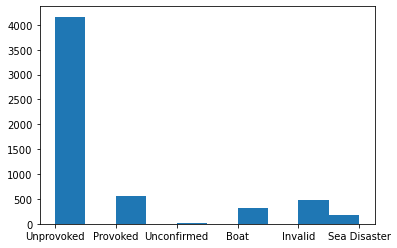

In [13]:
plt.hist(gsaf['Type'])
plt.show()

### Fatalities since 1900

Next we will look at the human fatalities from shark attacks since 1900. 

In [14]:
# Looking at the number of fatal incidents worldwide
gsaf['Fatal (Y/N)'].value_counts(dropna=False)

N          4151
Y          1038
NaN         470
UNKNOWN      55
F             2
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

Once again, there seems to be some erroneous values in the "Fatal" column. Since it should be a yes (Y) or no (N) field. The top 2 values are as they should be (Y or N). However, the 4 values that are shown as "F", "2017" and "M" are problematic. We could assume that the "F" and "M" are for a female or male that was fatally attacked, but we just don't know. We'll print out the rows for these 4 to see if anything stands out. If anything, we can change them to "UNKNOWN". 

In [15]:
# Identify the rows with nuls in the "Type" column
bad_fatal = gsaf[(gsaf['Fatal (Y/N)'] == 'F') | (gsaf['Fatal (Y/N)'] == '2017') | (gsaf['Fatal (Y/N)'] == 'M')]
print(bad_fatal[['Year', 'Type', 'Country', 'Activity', 'Injury', 'Fatal (Y/N)']])

     Year         Type           Country  \
17   2019  Unconfirmed    REUNION ISLAND   
22   2019  Unconfirmed         AUSTRALIA   
440  2016     Provoked  FRENCH POLYNESIA   
941  2012     Provoked             ITALY   

                                            Activity  \
17                                          Kayaking   
22                                      Spearfishing   
440                                     Spearfishing   
941  Attempting to rescue an injured & beached shark   

                                                Injury Fatal (Y/N)  
17     Partial remains recovered 12/26/2019 from shark           F  
22   Believed to have drowned. Partial remains wash...           F  
440  Laceration to knee by speared shark PROVOKED I...           M  
941           Lower left leg injured PROVOKED ACCIDENT        2017  


For these 4 incidents, it looks like two may have been fatal (though row 22 states that the victim believed to have drown) and two were non-fatal. We will change row 17 to "Y", 22 to "UNKNOWN" since the victim may not have been killed by a shark, and 440 & 941 to "N". Also, we will change the 470 null values to "UNKNOWN".

In [16]:
gsaf['Fatal (Y/N)'].replace({'2017':'N','M':'N'}, inplace = True)
gsaf.at[17, 'Fatal (Y/N)'] = 'Y'
gsaf.at[22, 'Fatal (Y/N)'] = 'UNKNOWN'
gsaf['Fatal (Y/N)'].fillna('UNKNOWN', inplace = True)
gsaf['Fatal (Y/N)'].value_counts(dropna=False)

N          4153
Y          1039
UNKNOWN     526
Name: Fatal (Y/N), dtype: int64

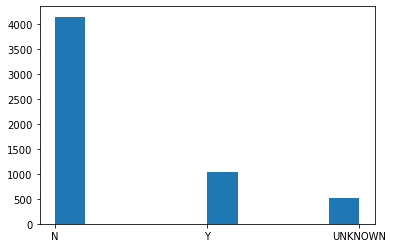

In [17]:
plt.hist(gsaf['Fatal (Y/N)'])
plt.show()

In [18]:
gsaf['Fatal (Y/N)'].value_counts(normalize = True)

N          0.726303
Y          0.181707
UNKNOWN    0.091990
Name: Fatal (Y/N), dtype: float64

Since 1900, approximately 18% of shark attacks have been fatal, according to the GSAF dataset. Nearly 73% were non-fatal, with about 9% being unknown. The fatality rate seems to be higher that I would have epxected, such as around 10%. Let's see if fatality rate is dependent upon the country.

### Fatalities by Country

Do certain countries have a higher fatality occurrence than others? We'll explore the fatalities of the top 20 countries in total shark attacks.

We will start by making a new column, named 'Fatal' and fill it with a 1, if fatal, and a 0 if non-fatal or unknown. It's tempting to make about 20% of the unknown fatality as being fatal, but unless we review the data line by line in more detail, we won't be able to accurately identify which of the 526 unknowns should be marked as fatal. Therefore, we will slightly underestimate the fatalities based on assigning all the unknowns as non-fatal.

In [19]:
# Make a new column and map a 'Y' from Fatal to 1 and 'N' & 'UNKNOWN' to 0
gsaf['Fatal'] = gsaf['Fatal (Y/N)'].map({'Y':1, 'N':0, 'UNKNOWN':0})
print(gsaf['Fatal'].head(10))

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    1
Name: Fatal, dtype: int64


In [20]:
# Verify the counts on the new 'Fatal' column are correct
gsaf['Fatal'].value_counts()

0    4679
1    1039
Name: Fatal, dtype: int64

The new 'Fatal' column has the correct number of fatalities, at 1039. Adding the original non-fatalities (4153) and unknowns (526) from the original 'Fatal (Y/N)' column, we get the same number as the new column (4679).

In [21]:
# Create a fatality dataframe by country
fatal = gsaf.groupby('Country')['Fatal'].sum()
fatal_df = pd.DataFrame(fatal)
fatal_df.columns = ['Fatal']
fatal_df.reset_index(inplace=True)

# Create a count of incidents dataframe by country
count = gsaf.groupby('Country')['Fatal (Y/N)'].count()
count_df = pd.DataFrame(count)
count_df.columns = ['Count']
count_df.reset_index(inplace=True)

# Merge the fatality and count dataframes
fatal_df = pd.merge(fatal_df, count_df, how = 'left', on = 'Country')
print(fatal_df)

                        Country  Fatal  Count
0             ADMIRALTY ISLANDS      0      1
1                AMERICAN SAMOA      3      3
2    ANDAMAN / NICOBAR ISLANDAS      1      1
3                        ANGOLA      0      1
4                       ANTIGUA      0      1
..                          ...    ...    ...
167                     VANUATU      7     11
168                   VENEZUELA      3      9
169                     VIETNAM      1     12
170               WESTERN SAMOA      1      1
171                       YEMEN      2      4

[172 rows x 3 columns]


In [22]:
# Calcualate a fatility rate by country
fatal_df['Fatality Rate'] = round((fatal_df['Fatal'] / fatal_df['Count']) * 100, 2)
print(fatal_df)

                        Country  Fatal  Count  Fatality Rate
0             ADMIRALTY ISLANDS      0      1           0.00
1                AMERICAN SAMOA      3      3         100.00
2    ANDAMAN / NICOBAR ISLANDAS      1      1         100.00
3                        ANGOLA      0      1           0.00
4                       ANTIGUA      0      1           0.00
..                          ...    ...    ...            ...
167                     VANUATU      7     11          63.64
168                   VENEZUELA      3      9          33.33
169                     VIETNAM      1     12           8.33
170               WESTERN SAMOA      1      1         100.00
171                       YEMEN      2      4          50.00

[172 rows x 4 columns]


In [23]:
# Isolate the top 20 countries based on the shark incident count
top20 = fatal_df.sort_values(by=['Count'], ascending=False, ignore_index=True)[:20]
print(top20)

             Country  Fatal  Count  Fatality Rate
0                USA    133   2161           6.15
1          AUSTRALIA    222   1216          18.26
2       SOUTH AFRICA     87    555          15.68
3   PAPUA NEW GUINEA     55    131          41.98
4             BRAZIL     35    109          32.11
5            BAHAMAS      6    106           5.66
6        NEW ZEALAND     12    104          11.54
7             MEXICO     36     84          42.86
8              ITALY      9     61          14.75
9        PHILIPPINES     33     58          56.90
10           REUNION     28     58          48.28
11     NEW CALEDONIA     17     54          31.48
12              FIJI     18     50          36.00
13        MOZAMBIQUE     18     41          43.90
14             EGYPT     10     34          29.41
15             SPAIN      3     33           9.09
16              CUBA     14     31          45.16
17             JAPAN     10     31          32.26
18            PANAMA     13     27          48.15


In [24]:
top20.sort_values(by=['Fatality Rate'], ascending=False)

,Country,Fatal,Count,Fatality Rate
9,PHILIPPINES,33,58,56.90
19,CROATIA,14,27,51.85
10,REUNION,28,58,48.28
18,PANAMA,13,27,48.15
16,CUBA,14,31,45.16
13,MOZAMBIQUE,18,41,43.90
7,MEXICO,36,84,42.86
3,PAPUA NEW GUINEA,55,131,41.98
12,FIJI,18,50,36.00
17,JAPAN,10,31,32.26


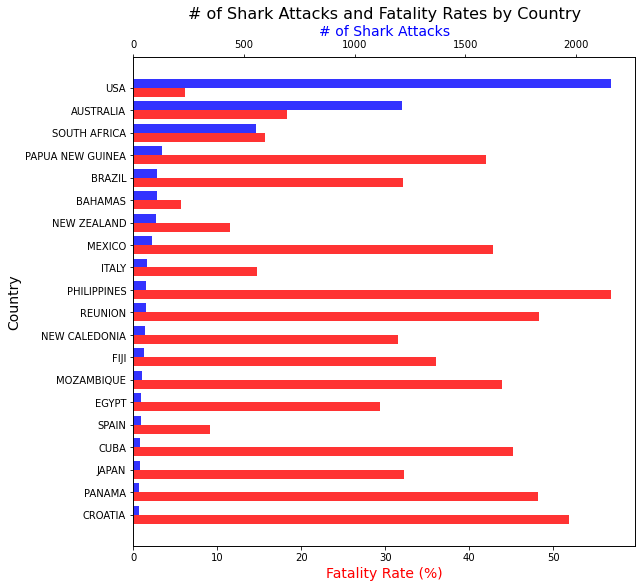

In [25]:
# Create a chart with the number of attacks and fatality rates for the top 20 countries
top20.sort_values(by=['Count'], ascending=True, inplace=True) # sorting to visualization purposes
fig,ax = plt.subplots(figsize=(9,9))
ax.barh(top20['Country'], top20['Fatality Rate'],color="red", alpha=0.8, height=-0.4, align='edge')
ax.set_xlabel("Fatality Rate (%)",color="red",fontsize=14)
ax.set_ylabel("Country",fontsize=14)
ax2=ax.twiny()
ax2.barh(top20['Country'], top20['Count'], color="blue", alpha=0.8, height=0.4, align='edge')
ax2.set_xlabel("# of Shark Attacks",color="blue",fontsize=14)
plt.title('# of Shark Attacks and Fatality Rates by Country', fontsize=16)
plt.show()


Of the top 20 countries in terms of number of recorded attacks, the Philippines (58 attacks) had the highest fatality rate at about 57%, followed by Croatia (52%) and Reunion Island & Panama (48%). The Bahamas, with 106 attacks, had the lowest fatality rate at under 6%. With the highest number of attacks (2161), the USA had the second lowest fatality rate at just over 6%. Australia had the second highest number of attacks (1216) and a fatality rate of approximately the worldwide average of 18%. 

An interesting observation from this dataset is that India is not listed as one of the top 20 countries with recorded shark attacks. The combination of a high population and large amount of coastal areas in a warmer climate suggests that the number of attacks in India should be relatively high. Additionally, only 3 countries from Africa are in the top 20 - South Africa (555), Mozambique (41), and Egypt(34). Similar to India, it would be expected that a few other countries from Africa could be on this list. The expectation is that shark attacks in those areas are probably under reported.

### Shark Species Involvement
At a first glance, the GSAF dataset had quite a variety of values in the shark species column. Let's look to see if there are any patterns. First, we'll take a look at the data for South Africa, since there have been over 500 attacks recorded and about a 16% fatality rate.

In [26]:
# Isolate the South Africa dataset
south_africa = gsaf[gsaf['Country'] == 'SOUTH AFRICA']
south_africa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 13 to 5721
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             555 non-null    object
 1   Date                    555 non-null    object
 2   Year                    555 non-null    int64 
 3   Type                    555 non-null    object
 4   Country                 555 non-null    object
 5   Area                    550 non-null    object
 6   Location                547 non-null    object
 7   Activity                515 non-null    object
 8   Name                    544 non-null    object
 9   Unnamed: 9              2 non-null      object
 10  Age                     366 non-null    object
 11  Injury                  554 non-null    object
 12  Fatal (Y/N)             555 non-null    object
 13  Time                    347 non-null    object
 14  Species                 417 non-null    object
 15  Inve

Per the South Africa set, there are 555 records. The 'Species' column has information (non-null values) in 417 of the rows. Let's see what kind of information is present for the species column.

In [27]:
# list the first 20 records for 'Species'
print(south_africa['Species '].head(20))

13                                                NaN
28                                   White shark, 4 m
66                              White shark, juvenile
100                                       2.5 m shark
105                                               NaN
119                                   White shark, 3m
166                                               NaN
176                                White shark, 2.5 m
186                                       White shark
191                                    Blacktip shark
229               Death may have been due to drowning
238                                               NaN
245                                               NaN
277                                White shark, 2.5 m
301                                               NaN
313    Shark involvement prior to death not confirmed
333                                       Tiger shark
347                                  White shark, 4 m
413                         

In the first 20 records for South Africa attacks, we can see 9 instances of a White shark being involved. However, the data is not formatted consistently. The good news is that "White shark" is consistently noted, sometimes with other information, such as approximate length. Now, let's take a look at the 'Species ' information for the USA.

In [28]:
# Isolate the USA dataset & print the first 20 values from the 'Species' column
usa = gsaf[gsaf['Country'] == 'USA']
print(usa['Species '].head(20))

0                 Tiger shark
4                         NaN
15                        NaN
19        10'-12' tiger shark
20    Juvenile blacktip shark
26    4' to 5' blacktip shark
31             4' to 5' shark
34                        NaN
36                        NaN
37             Juvenile shark
39             6' to 7' shark
40                        NaN
41                   2' shark
42                        NaN
43                        NaN
45                Nurse shark
46                        NaN
47                 6.5' shark
48                        NaN
49                        NaN
Name: Species , dtype: object


In [29]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2161 entries, 0 to 5720
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             2161 non-null   object
 1   Date                    2161 non-null   object
 2   Year                    2161 non-null   int64 
 3   Type                    2161 non-null   object
 4   Country                 2161 non-null   object
 5   Area                    2159 non-null   object
 6   Location                2124 non-null   object
 7   Activity                2037 non-null   object
 8   Name                    2131 non-null   object
 9   Unnamed: 9              6 non-null      object
 10  Age                     1545 non-null   object
 11  Injury                  2156 non-null   object
 12  Fatal (Y/N)             2161 non-null   object
 13  Time                    1430 non-null   object
 14  Species                 1313 non-null   object
 15  Inve

Of the 2161 records for the USA, only 1313 have actual information in the 'Species ' column. Of the first 20 records, only a few have a species listed. Let's remove the nulls from the USA data and re-look.

In [30]:
# Isolate the non-null values for Species in the USA dataset
usa = usa[usa['Species '].isnull() == False]
print(usa['Species '].head(20))

0                                           Tiger shark
19                                  10'-12' tiger shark
20                              Juvenile blacktip shark
26                              4' to 5' blacktip shark
31                                       4' to 5' shark
37                                       Juvenile shark
39                                       6' to 7' shark
41                                             2' shark
45                                          Nurse shark
47                                           6.5' shark
51                                     10' to 12' shark
56                                   Blacktip shark, 5'
60                            Blacktip or Spinner shark
61                                      Sandtiger shark
64                                            shark pup
73                                 Bull shark, 4' to 5'
81    Shark involvement unconfirmed but considered p...
82                                             8

After removing the null data from the USA Species column, there are several different shark species listed, including Tiger, Nurse, Blacktip and Bull sharks. Assuming this information is accurate, we'll try to cleanup the 'Species ' information for the entire dataset. 

#### Cleaning and Organizing the Species Column
We'll start cleaning and organizing the species column. The main goal will be to extract the species listed, but there are many records with just a length or some general comment. These will be changed to unknown, along with any nulls.

In [31]:
# Replace null values for Species with 'Unknown' and split the 'Species' string for further analysis
gsaf['Species '].fillna('unknown', inplace = True)
gsaf['species'] = gsaf['Species '].str.lower().str.replace('\"','').str.replace('\?','').str.replace('questionable','unknown').str.replace("\'",'').str.replace('.','').str.split()
print(gsaf['species'].head(20))
print(gsaf['species'].tail(20))

0                                        [tiger, shark]
1                                             [unknown]
2                                     [a, small, shark]
3                       [broadnose, seven, gill, shark]
4                                             [unknown]
5                                             [unknown]
6                                        [lemon, shark]
7                                        [white, shark]
8                                             [unknown]
9                                             [unknown]
10    [shovelnose, shark, which, is, a, ray,, not, a...
11                                            [unknown]
12                                            [unknown]
13                                            [unknown]
14                                            [unknown]
15                                            [unknown]
16                                       [white, shark]
17                                [34, m, tiger,

/tmp/ipykernel_12226/4056585008.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  gsaf['species'] = gsaf['Species '].str.lower().str.replace('\"','').str.replace('\?','').str.replace('questionable','unknown').str.replace("\'",'').str.replace('.','').str.split()
/tmp/ipykernel_12226/4056585008.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gsaf['species'] = gsaf['Species '].str.lower().str.replace('\"','').str.replace('\?','').str.replace('questionable','unknown').str.replace("\'",'').str.replace('.','').str.split()


We'll piece back together some of the individual words from the species column. Those with a number of words greater than 5 will be ignored. There are too many options to review for those. Those under 5 words will be combined for further analysis. 

In [32]:
# Function to concatenate the split words in the species column
def shark_name(my_list):
    if len(my_list) >= 5:
        return 'very long'
    elif len(my_list) == 4:
        return str(my_list[-4] + ' ' + my_list[-3] + ' ' + my_list[-2] + ' ' + my_list[-1])
    elif len(my_list) == 3:
        return str(my_list[-3] + ' ' + my_list[-2] + ' ' + my_list[-1])
    elif len(my_list) == 2:
        return str(my_list[-2] + ' ' + my_list[-1])
    else:        
        return 'unknown'

gsaf['Species'] = gsaf['species'].apply(shark_name)
gsaf['Species'].unique()

array(['tiger shark', 'unknown', 'a small shark',
       'broadnose seven gill shark', 'lemon shark', 'white shark',
       'very long', '34 m tiger shark', '10-12 tiger shark',
       'juvenile blacktip shark', '5 blacktip shark', 'white shark, 4 m',
       '10 tiger shark', '4 to 5 shark', 'oceanic whitetip shark',
       '7 shark', 'white shark, 35 m', 'juvenile shark', '1+ m shark',
       '6 to 7 shark', '2 shark', '14 white shark', 'nurse shark',
       '65 shark', '10 to 12 shark', 'blacktip shark, 5',
       'blacktip or spinner shark', 'sandtiger shark', 'white shark, 3m',
       'shark pup', 'white shark, juvenile', 'bull shark pup',
       'bull shark, 35 m', '8 shark', 'cookiecutter shark',
       'sand tiger shark', '12 shark', 'grey reef shark, 4', '4 shark',
       'spinner shark', '25 m shark', 'bull shark', 'wobbegong shark',
       'white shark, 46m', 'mako shark, 7', 'bronze whaler 25m',
       'reef shark x 2', '5 shark', '3 to 4 shark',
       'white shark, 5m fema

Many of the sharks involved have been cleaned up, but there's still quite a bit of variety. A lot of them include some sort of measurement, and some have shark names that are more than 2 words (ex. - tawny nurse shark and bronze whaler shark).

In [33]:
# Updated look at the most common results for the shark species involved
gsaf['Species'].value_counts()

unknown                            2488
very long                          1213
white shark                         164
shark involvement not confirmed      88
tiger shark                          82
                                   ... 
=+3 shark                             1
reef shark, 18m                       1
broadnose sevengill shark             1
mako shark, 3m                        1
tiger shark, 39 m                     1
Name: Species, Length: 578, dtype: int64

In [34]:
# Manually create a list of shark species commonly seen in the species column
sharks = ['white shark', 'bull shark', 'tiger shark', 'hammerhead shark', 'grey nurse shark', 'tawney nurse shark'
         'bronze whaler shark', 'tawny nurse shark', 'nurse shark', 'sand tiger shark', 'oceanic whitetip shark', 
         'whitetip reef shark', 'thresher shark', 'caribbean reef shark', 'blue shark', 'lemon shark', 
         'spinner shark', 'wobbegong', 'sandtiger shark', 'blacktip shark', 'porbeagle shark', 'mako shark', 
         'salmon shark', 'sandbar shark', 'zambesi shark', 'goblin shark', 'raggedtooth shark', 'port jackson shark', 
         'cow shark', '7-gill shark', 'silky shark', 'galapagos shark', 'grey reef shark', 'cookiecutter shark',
         'seven gill shark']

# Create a function to populate a new column named, 'Species ID', with the appropriate species name
def shark_id(a_list):
    for s in sharks:
        if s in a_list:
            return s
    return 'TBD'

gsaf['Species ID'] = gsaf['Species'].apply(shark_id)
gsaf['Species ID'].value_counts()

TBD                       4785
white shark                288
tiger shark                169
bull shark                 111
wobbegong                   40
nurse shark                 39
blacktip shark              34
blue shark                  29
spinner shark               27
mako shark                  26
raggedtooth shark           26
lemon shark                 25
grey nurse shark            22
hammerhead shark            20
zambesi shark               15
oceanic whitetip shark      13
grey reef shark              7
caribbean reef shark         7
porbeagle shark              4
galapagos shark              4
tawny nurse shark            3
7-gill shark                 3
salmon shark                 3
cookiecutter shark           3
thresher shark               3
silky shark                  2
goblin shark                 2
cow shark                    2
sandbar shark                2
whitetip reef shark          2
port jackson shark           1
seven gill shark             1
Name: Sp

Not the easiest way, but putting together the list of sharks identified attacks helped get an idea of which sharks have been involved the most in recorded attacks. There is some cleanup still to do, because regional differences in common shark names is prevalent. For example, the sandtiger, raggedtooth, and grey nurse shark all refer to the same species. As does the zambesi and bull sharks (along with other names). Additionally, there are several types of hammerhead sharks, yet this dataset does not seem to have much differentiation of those species.

Per the Florida Museum's webpage regarding bull sharks, https://www.floridamuseum.ufl.edu/discover-fish/species-profiles/carcharhinus-leucas/, 
"It is known by many different common names throughout its range including requin bouledogue in French speaking countries; Tiburon sarda in Spain; Zambezi shark, Van Rooyen’s shark in South Africa; The Ganges shark in India (though this name is also given to the freshwater river shark Glyphis gangeticus); The Nicaragua shark in Central America; The freshwater whaler, estuary whaler, and Swan River whaler in Australia; The shovelnose shark, square-nose shark, river shark, slipway grey shark, ground shark, and cub shark in various English speaking parts of the world."

In hindsight, using the scientific names for the different shark species would be ideal for limiting the regional naming issues. However, that information is not available in this dataset. Another issue is the exact identification of the shark. Many species are very similar in body shape, color, size, etc. so exact identification would be difficult for most witnesses.

In [35]:
# Combine some of the different spelling or local names for the same shark species
change_names = {'seven gill shark':'7-gill shark', 'zambesi shark':'bull shark', 'grey nurse shark':'raggedtooth shark',
                }
gsaf['Species ID'].astype(str)
gsaf['Species ID'].replace(change_names, value=None, inplace=True)
gsaf['Species ID'].value_counts()

TBD                       4785
white shark                288
tiger shark                169
bull shark                 126
raggedtooth shark           48
wobbegong                   40
nurse shark                 39
blacktip shark              34
blue shark                  29
spinner shark               27
mako shark                  26
lemon shark                 25
hammerhead shark            20
oceanic whitetip shark      13
grey reef shark              7
caribbean reef shark         7
porbeagle shark              4
7-gill shark                 4
galapagos shark              4
salmon shark                 3
tawny nurse shark            3
cookiecutter shark           3
thresher shark               3
silky shark                  2
goblin shark                 2
cow shark                    2
sandbar shark                2
whitetip reef shark          2
port jackson shark           1
Name: Species ID, dtype: int64

The fact that the white shark, tiger shark and bull shark are at the top of the list in terms of number of attacks is not surprising. What is a bit surprising is the wobbegong and nurse shark in the top 6. Those species of shark are normally known for being on the more sluggish/slow moving side that spend quite a bit of their time resting on the seafloor. Yet, they have more attacks attributed to them than some of the more "agressive" sharks, such as the oceanic white tip.

In [36]:
# Isolating the known species names and excluding those that were TBD/unknown
shark_id = gsaf[gsaf['Species ID'] != 'TBD']
print(shark_id.head())
shark_id.shape

   Case Number         Date  Year        Type      Country               Area  \
0   2020.02.05  05-Feb-2020  2020  Unprovoked          USA               Maui   
3   2020.01.16  16-Jan-2020  2020  Unprovoked  NEW ZEALAND          Southland   
6   2020.01.07  07-Jan-2020  2020  Unprovoked    AUSTRALIA         Queensland   
7   2020.01.05  05-Jan-2020  2020  Unprovoked    AUSTRALIA  Western Australia   
16  2019.12.20  20-Dec-2019  2019    Provoked    AUSTRALIA    New South Wales   

                   Location                  Activity          Name  \
0                       NaN  Stand-Up Paddle boarding           NaN   
3               Oreti Beach                   Surfing   Jordan King   
6         North West Island                  Swimming   Miah Holmes   
7   Cull Island / Esperance              Scuba diving  Gary Johnson   
16             Shellharbour                   Fishing           NaN   

   Unnamed: 9  ...                             Injury Fatal (Y/N)   Time  \
0         

(933, 21)

In [37]:
# Create a fatality dataframe by species
species_fatal = gsaf.groupby('Species ID')['Fatal'].sum()
species_fatal_df = pd.DataFrame(species_fatal)
species_fatal_df.columns = ['Fatal']
species_fatal_df.reset_index(inplace=True)

# Create a count of incidents dataframe by species
species_count = gsaf.groupby('Species ID')['Fatal'].count()
species_count_df = pd.DataFrame(species_count)
species_count_df.columns = ['Count']
species_count_df.reset_index(inplace=True)

# Merge the fatality and count dataframes
species_fatal_df = pd.merge(species_fatal_df, species_count_df, how = 'left', on = 'Species ID')
print(species_fatal_df)


                Species ID  Fatal  Count
0             7-gill shark      0      4
1                      TBD    905   4785
2           blacktip shark      0     34
3               blue shark      5     29
4               bull shark     20    126
5     caribbean reef shark      0      7
6       cookiecutter shark      0      3
7                cow shark      0      2
8          galapagos shark      0      4
9             goblin shark      0      2
10         grey reef shark      0      7
11        hammerhead shark      0     20
12             lemon shark      0     25
13              mako shark      2     26
14             nurse shark      0     39
15  oceanic whitetip shark      1     13
16         porbeagle shark      0      4
17      port jackson shark      0      1
18       raggedtooth shark      0     48
19            salmon shark      0      3
20           sandbar shark      0      2
21             silky shark      0      2
22           spinner shark      0     27
23       tawny n

In [38]:
# Calcualate a fatility rate by species
species_fatal_df['Fatality Rate'] = round((species_fatal_df['Fatal'] / species_fatal_df['Count']) * 100, 2)
print(species_fatal_df)

                Species ID  Fatal  Count  Fatality Rate
0             7-gill shark      0      4           0.00
1                      TBD    905   4785          18.91
2           blacktip shark      0     34           0.00
3               blue shark      5     29          17.24
4               bull shark     20    126          15.87
5     caribbean reef shark      0      7           0.00
6       cookiecutter shark      0      3           0.00
7                cow shark      0      2           0.00
8          galapagos shark      0      4           0.00
9             goblin shark      0      2           0.00
10         grey reef shark      0      7           0.00
11        hammerhead shark      0     20           0.00
12             lemon shark      0     25           0.00
13              mako shark      2     26           7.69
14             nurse shark      0     39           0.00
15  oceanic whitetip shark      1     13           7.69
16         porbeagle shark      0      4        

With the limited number of shark species identified, the data shows that the Tiger shark has the highest fatality rate at almost 24%. It's followed closely by the White shark at 23%. 

In [39]:
# Isolate the top 20 species based on the shark incident count and will not use the 'TBD' data
species_top20 = species_fatal_df.sort_values(by=['Count'], ascending=False, ignore_index=True)[1:21]
print(species_top20)

                Species ID  Fatal  Count  Fatality Rate
1              white shark     66    288          22.92
2              tiger shark     40    169          23.67
3               bull shark     20    126          15.87
4        raggedtooth shark      0     48           0.00
5                wobbegong      0     40           0.00
6              nurse shark      0     39           0.00
7           blacktip shark      0     34           0.00
8               blue shark      5     29          17.24
9            spinner shark      0     27           0.00
10              mako shark      2     26           7.69
11             lemon shark      0     25           0.00
12        hammerhead shark      0     20           0.00
13  oceanic whitetip shark      1     13           7.69
14    caribbean reef shark      0      7           0.00
15         grey reef shark      0      7           0.00
16         galapagos shark      0      4           0.00
17            7-gill shark      0      4        

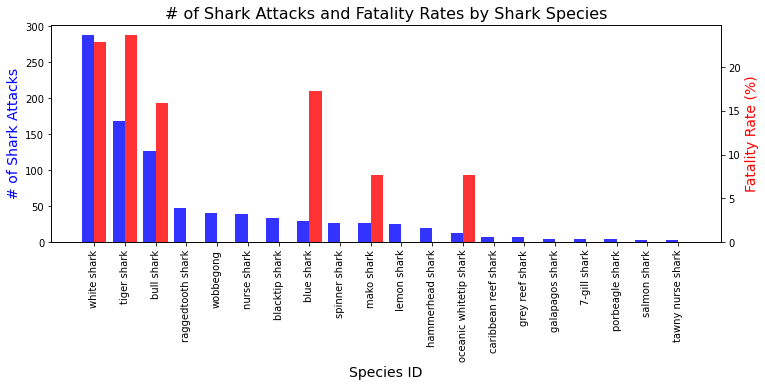

In [40]:
# Plot the number of attacks and fatality rate by species
fig,ax = plt.subplots(figsize=(12,4))
ax.bar(species_top20['Species ID'], species_top20['Count'], color="blue", alpha=0.8, width=-0.4, align='edge')
ax.set_xlabel("Species ID",fontsize=14)
ax.set_ylabel("# of Shark Attacks",color="blue",fontsize=14)
ax.tick_params(axis='x', labelrotation = 90)
ax2=ax.twinx()
ax2.bar(species_top20['Species ID'], species_top20['Fatality Rate'],color="red", alpha=0.8, width=0.4, align='edge')
ax2.set_ylabel("Fatality Rate (%)",color="red",fontsize=14)
plt.title('# of Shark Attacks and Fatality Rates by Shark Species', fontsize=16)
plt.show()

In [41]:
# Reverse the sorting of the species for horizontal bar chart for easier viewing
species_top20_h = species_fatal_df.sort_values(by=['Count'], ignore_index=True)[-21:-1]
print(species_top20_h)

                Species ID  Fatal  Count  Fatality Rate
8        tawny nurse shark      0      3           0.00
9       cookiecutter shark      0      3           0.00
10         porbeagle shark      0      4           0.00
11            7-gill shark      0      4           0.00
12         galapagos shark      0      4           0.00
13    caribbean reef shark      0      7           0.00
14         grey reef shark      0      7           0.00
15  oceanic whitetip shark      1     13           7.69
16        hammerhead shark      0     20           0.00
17             lemon shark      0     25           0.00
18              mako shark      2     26           7.69
19           spinner shark      0     27           0.00
20              blue shark      5     29          17.24
21          blacktip shark      0     34           0.00
22             nurse shark      0     39           0.00
23               wobbegong      0     40           0.00
24       raggedtooth shark      0     48        

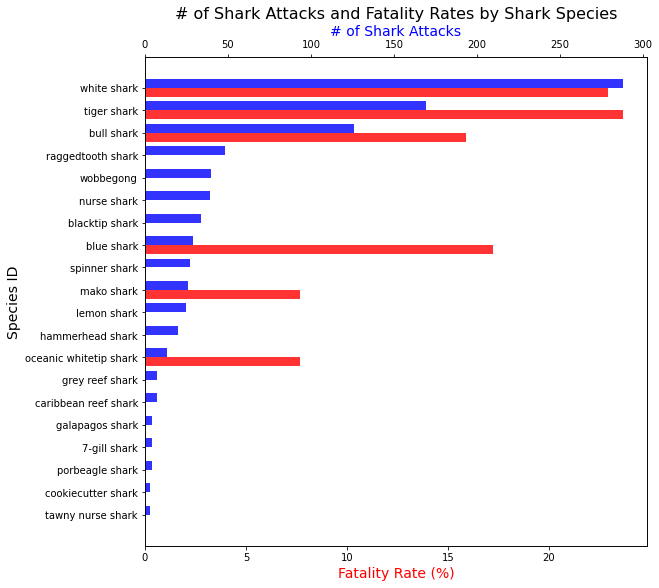

In [42]:
fig,ax = plt.subplots(figsize=(9,9))
ax.barh(species_top20_h['Species ID'], species_top20_h['Fatality Rate'],color="red", height=-0.4, alpha=0.8, align='edge')
ax.set_xlabel("Fatality Rate (%)",color="red",fontsize=14)
ax.set_ylabel("Species ID",fontsize=14)
ax2 = ax.twiny()
ax2.barh(species_top20_h['Species ID'], species_top20_h['Count'], color="blue", height=0.4, alpha=0.8, align='edge')
ax2.set_xlabel("# of Shark Attacks",color="blue",fontsize=14)
plt.title('# of Shark Attacks and Fatality Rates by Shark Species', fontsize=16)
plt.show()

While the White Shark had more attacks attributed to it (288), the Tiger Shark (169 attacks) had a slightly higher fatality rate (23% for the White Shark and 24% for the Tiger Shark). The next highest fatality rate came from the Blue Shark, at ~17%, with 5 of 29 attacks ending in a human death. 

Of course, these numbers should be taken as a sample only, since, in 4785 of the attacks (~19% fatality rate), the shark species was not identified. Also, for this analysis, we assumed that any of the records with an 'unknown' entry for the 'Fatal (Y/N)' column were not fatal. Assuredly, the number of attacks and fatality counts for several of these shark species would be higher if more, or all, sharks were identified in those attacks. 

Before moving on, let's take a quick look at some of the species identified with the most attacks and their values in the 'Fatal (Y/N)' column.

In [43]:
white = gsaf[gsaf['Species ID'] == 'white shark']
print('White Shark', '\n', white['Fatal (Y/N)'].value_counts(), '\n')

tiger = gsaf[gsaf['Species ID'] == 'tiger shark']
print('Tiger Shark', '\n', tiger['Fatal (Y/N)'].value_counts(), '\n')

bull = gsaf[gsaf['Species ID'] == 'bull shark']
print('Bull Shark', '\n', bull['Fatal (Y/N)'].value_counts())


White Shark 
 N          216
Y           66
UNKNOWN      6
Name: Fatal (Y/N), dtype: int64 

Tiger Shark 
 N          125
Y           40
UNKNOWN      4
Name: Fatal (Y/N), dtype: int64 

Bull Shark 
 N    106
Y     20
Name: Fatal (Y/N), dtype: int64


Based on this output, only 6 of the 288 attacks by White Sharks did not have a definite fatality or non-fatality value. For the Tiger Shark, only 4 of the 169 were unknown. Based on this information, assuming the 'unknown' fatality values were non-fatal, the final fatality rates wouldn't have changed significantly for these species. Again, with so many unknowns (species ID, fatality, etc.) in these records, we're looking for trends more so than exact numbers.

### Activity of Humans During Shark Attacks

Let's take a look at what the humans were doing during the shark attacks. This information is documented in the 'Activity' column of the GSAF dataset. Like the some of other text-based columns, quite a bit of cleanup in this information is expected.

In [44]:
gsaf['Activity'].describe()

count        5276
unique       1310
top       Surfing
freq         1022
Name: Activity, dtype: object

The 'Activity' column has 5276 records with 1310 unique entries, and the most numerous is, unsurprisingly, surfing (1022 attacks). 

In [45]:
gsaf['Activity'].value_counts(dropna=False).head(30)

Surfing            1022
Swimming            813
NaN                 442
Fishing             405
Spearfishing        345
Wading              151
Diving              111
Snorkeling           99
Standing             96
Scuba diving         79
Bathing              76
Body boarding        62
Body surfing         50
Kayaking             37
Boogie boarding      36
Treading water       32
Free diving          29
Pearl diving         22
Surf skiing          20
Windsurfing          19
Floating             18
Boogie Boarding      17
Walking              17
Shark fishing        14
Surf fishing         13
Rowing               12
Surf-skiing          12
Kayak Fishing        11
Freediving           10
Scuba Diving         10
Name: Activity, dtype: int64

Much like some of the other columns, the 'Activity' column contains similar activities, such as Diving, Scuba Diving, Pearl diving, Freediving. Also, does "Boogie boarding" and body boarding mean the same activity? Yes, they are similar enough to each other, but different from surfing. Let's clean up some of the activities.

In [46]:
# Replace the null values with 'unknown' and change all the values to lowercase
gsaf['Activity'].fillna('unknown', inplace = True)
gsaf['Activity'] = gsaf['Activity'].str.lower().str.replace('-',' ')
gsaf['Activity'].value_counts().head(40)

surfing                    1022
swimming                    813
unknown                     445
fishing                     405
spearfishing                345
wading                      151
diving                      111
snorkeling                   99
standing                     96
scuba diving                 93
bathing                      76
body boarding                71
boogie boarding              53
body surfing                 53
kayaking                     37
treading water               32
surf skiing                  32
free diving                  31
pearl diving                 22
windsurfing                  19
floating                     18
walking                      17
shark fishing                15
kayak fishing                14
surf fishing                 14
sea disaster                 13
rowing                       12
paddle boarding              11
canoeing                     11
kite surfing                 11
fishing for sharks           10
freedivi

In [47]:
# Manually create a dictionary to change the original activity to a similar category
change_acts = {'diving for trochus':'diving', 'scuba diving':'diving', 'diving for abalone':'diving',
                'free diving':'freediving', 'fishing for sharks':'fishing', 'surf fishing':'fishing',
                'shark fishing':'fishing', 'kayak fishing':'fishing', 'freedom swimming':'swimming',
              'boogie boarding':'body boarding', 'body surfing':'body boarding', 'wade fishing':'fishing',
              'standing':'wading', 'bathing':'wading', 'walking':'wading', 'kayaking':'watercraft',
              'rowing':'watercraft', 'canoeing':'watercraft', 'pearl diving':'diving', 'treading water':'swimming',
              'surf skiing':'surfing', 'floating':'swimming', 'skindiving':'snorkeling', 'kite surfing':'surfing',
              'spearfishing on scuba':'spearfishing', 'stand up paddleboarding':'paddle boarding',
              'sitting on surfboard':'surfing', 'surfing (sitting on his board)':'surfing', 'splashing':'wading',
              'kayaking / fishing':'fishing', 'free diving / spearfishing':'spearfishing', 'fishing on a boat':'fishing',
              'fishing for mackerel':'fishing', 'free diving for abalone':'freediving', 'spearfishing / free diving':'spearfishing',
              'spearfishing (free diving)':'spearfishing', 'sailing':'boat', 'scuba diving (submerged)':'diving',
              'scuba diving (but on surface)':'diving', 'playing':'wading', 'paddling on surfboard':'surfing',
              'skin diving':'snorkeling', 'free diving & spearfishing':'spearfishing'}
gsaf['Activity'].astype(str)
gsaf['Activity'].replace(change_acts, value=None, inplace=True)
gsaf['Activity'].value_counts().head(30)

surfing                    1085
swimming                    872
fishing                     482
unknown                     445
spearfishing                370
wading                      354
diving                      250
body boarding               177
snorkeling                  109
watercraft                   62
freediving                   48
windsurfing                  19
paddle boarding              18
sea disaster                 13
boat                         10
fell overboard                9
paddleskiing                  5
kite boarding                 5
feeding sharks                5
lifesaving drill              4
tagging sharks                4
jumping                       4
shell diving                  4
jumped into the water         4
sponge diving                 4
floating on his back          4
shipwreck                     4
air disaster                  4
diving for beche de mer       4
murder                        4
Name: Activity, dtype: int64

There are still a variety of activities, but we're just looking for generalities of the most common types. We've combined a lot of the different activities, so lets' see the top 15 activities. 

In [48]:
gsaf['Activity'].value_counts().head(15)

surfing            1085
swimming            872
fishing             482
unknown             445
spearfishing        370
wading              354
diving              250
body boarding       177
snorkeling          109
watercraft           62
freediving           48
windsurfing          19
paddle boarding      18
sea disaster         13
boat                 10
Name: Activity, dtype: int64

In [49]:
gsaf['Activity'].value_counts(normalize=True).head(15)*100

surfing            18.975166
swimming           15.250087
fishing             8.429521
unknown             7.782441
spearfishing        6.470794
wading              6.190976
diving              4.372158
body boarding       3.095488
snorkeling          1.906261
watercraft          1.084295
freediving          0.839454
windsurfing         0.332284
paddle boarding     0.314795
sea disaster        0.227352
boat                0.174886
Name: Activity, dtype: float64

There still seems to be some overlap between activities. For example, should fishing and spearfishing be counted as the same? What about swimming and wading? Body boarding and surfing? Windsurfing & surfing? For this analysis, we'll keep them as they are currently categorized since they are similar to, but different enough, from each other.

Based on the current results, the highest number of attacks occurred on surfers (19%), followed closely by swimmers (15%). Fishing comes in at number 3 with 8.4%. 

### Provoked Versus Unprovoked Shark Attacks by Human Activity

With Surfing being the most common human acitivity for all shark attacks, let's take a look at which human activities are the most common for provoked and unprovoked shark attacks. It's doubtful that surfing would a common activity associated with provoked shark attacks, so what activities are most common with provoked attacks?

In [50]:
# Isolate only the provoked attacks
provoked = gsaf[gsaf['Type'] == 'Provoked']
provoked['Activity'].value_counts(normalize=True).head(15)*100

fishing                               36.265709
spearfishing                          10.053860
unknown                                5.745063
diving                                 4.129264
surfing                                2.692998
swimming                               1.974865
wading                                 1.795332
freediving                             1.436266
snorkeling                             1.256732
watercraft                             0.718133
feeding sharks                         0.538600
seine netting                          0.538600
finning the shark that bit him         0.359066
hoisting shark aboard fishing boat     0.359066
tagging sharks                         0.359066
Name: Activity, dtype: float64

In [51]:
provoked['Activity'].describe()

count         557
unique        189
top       fishing
freq          202
Name: Activity, dtype: object

By far, fishing was the most dominant human activity for provoked attacks (36%). Second was spearfishing at 10%. It's not surprising that those two acitivities account for 46% of of the provoked attacks. Further research into these activities may be beneficial. There were 189 unique entries for human activity, so let's take a look at the unique values.

In [52]:
provoked['Activity'].unique()

array(['swimming', 'fishing', 'feeding sharks', 'surfing',
       'diving in shark tank', 'unknown', 'spearfishing',
       'putting hand in shark tank', 'wading', 'freediving',
       'kayak fishing for sharks', 'fishing / wading', 'touching a shark',
       'attempting to lasso a shark', 'grabbing shark for a selfie',
       'lobstering', 'teasing a shark', 'fishing for blue sharks',
       'petting a shark', 'longline fishing for sharks',
       "fishing   'tag & release'",
       'attempting to rescue an injured & beached shark',
       'diving, feeding sharks', 'fishing (illegally)', 'watercraft',
       'diving', 'standing, holding shark pup',
       'shark fishing on the ricardo astorga',
       'shark fishing on the don agustín vi.', 'snorkeling',
       'measuring sharks', 'surf fishing / wading', 'body boarding',
       "accidentally stood on hooked shark's tail before attempting to gut it",
       'fishing for snapper', 'removing hook from shark',
       'reviving a sedated 

The 189 unique entries for human activity for provoked attacks could probably be combined into fewer categories, based on the listing of them. Just from a quick glance at many of these, it looks like fishing is mentioned in the text numerous times in this column. Therefore, we can safely assume that the fishing activity was responsible for much more than the 36% of provoked shark attacks. The bottomline is that fishing is the major human activity ocurring during provoked shark attacks.

In [53]:
unprovoked = gsaf[gsaf['Type'] == 'Unprovoked']
unprovoked['Activity'].value_counts(normalize=True).head(15)*100

surfing            24.501561
swimming           18.496277
wading              7.758828
spearfishing        6.701898
unknown             6.461686
diving              4.732164
body boarding       3.987509
fishing             3.146769
snorkeling          2.354072
freediving          0.840740
windsurfing         0.456402
paddle boarding     0.432380
watercraft          0.288254
fell overboard      0.192169
kite boarding       0.120106
Name: Activity, dtype: float64

As expected, surfing (24.5%) and swimming (18.5%) were the most common human activities occurring during unprovoked shark attacks. 

### Fatality by Human Activity

Are there certain human activities that lead to a greater fatality rate? Let's take a look at the fatality rates for the documented human activities. 

In [54]:
# Create a fatality dataframe by human activity
act_fatal = gsaf.groupby('Activity')['Fatal'].sum()
act_fatal_df = pd.DataFrame(act_fatal)
act_fatal_df.columns = ['Fatal']
act_fatal_df.reset_index(inplace=True)

# Create a count of incidents dataframe by human activity
act_count = gsaf.groupby('Activity')['Fatal'].count()
act_count_df = pd.DataFrame(act_count)
act_count_df.columns = ['Count']
act_count_df.reset_index(inplace=True)

# Merge the fatality and count dataframes
act_fatal_df = pd.merge(act_fatal_df, act_count_df, how = 'left', on = 'Activity')
print(act_fatal_df)

                                               Activity  Fatal  Count
0     "climbing up to ship after repairing the stern...      1      1
1     "flying tiger" transport plane went down with ...      1      2
2                             "riding waves on a board"      0      1
3                                 "swimming vigorously"      0      1
4                                                     .      1      3
...                                                 ...    ...    ...
1225                          wreck of the tug magellan      1      1
1226   yacht gooney bird foundered, 4 survivors on raft      0      1
1227                   yacht of michael howell capsized      1      1
1228                                         yacht race      0      1
1229  zosimo & his son, jeffrey popa, failed to retu...      0      1

[1230 rows x 3 columns]


In [55]:
# Calcualate a fatility rate by activity
act_fatal_df['Fatality Rate'] = round((act_fatal_df['Fatal'] / act_fatal_df['Count']) * 100, 2)
print(act_fatal_df)

                                               Activity  Fatal  Count  \
0     "climbing up to ship after repairing the stern...      1      1   
1     "flying tiger" transport plane went down with ...      1      2   
2                             "riding waves on a board"      0      1   
3                                 "swimming vigorously"      0      1   
4                                                     .      1      3   
...                                                 ...    ...    ...   
1225                          wreck of the tug magellan      1      1   
1226   yacht gooney bird foundered, 4 survivors on raft      0      1   
1227                   yacht of michael howell capsized      1      1   
1228                                         yacht race      0      1   
1229  zosimo & his son, jeffrey popa, failed to retu...      0      1   

      Fatality Rate  
0            100.00  
1             50.00  
2              0.00  
3              0.00  
4            

In [56]:
# Reverse the sorting of the activities for horizontal bar chart
act_top15_h = act_fatal_df.sort_values(by=['Count'], ignore_index=True)[-15:]
print(act_top15_h)

             Activity  Fatal  Count  Fatality Rate
1215             boat      0     10           0.00
1216     sea disaster      6     13          46.15
1217  paddle boarding      0     18           0.00
1218      windsurfing      3     19          15.79
1219       freediving      7     48          14.58
1220       watercraft      3     62           4.84
1221       snorkeling     18    109          16.51
1222    body boarding     25    177          14.12
1223           diving     38    250          15.20
1224           wading     58    354          16.38
1225     spearfishing     48    370          12.97
1226          unknown     73    445          16.40
1227          fishing     37    482           7.68
1228         swimming    263    872          30.16
1229          surfing     49   1085           4.52


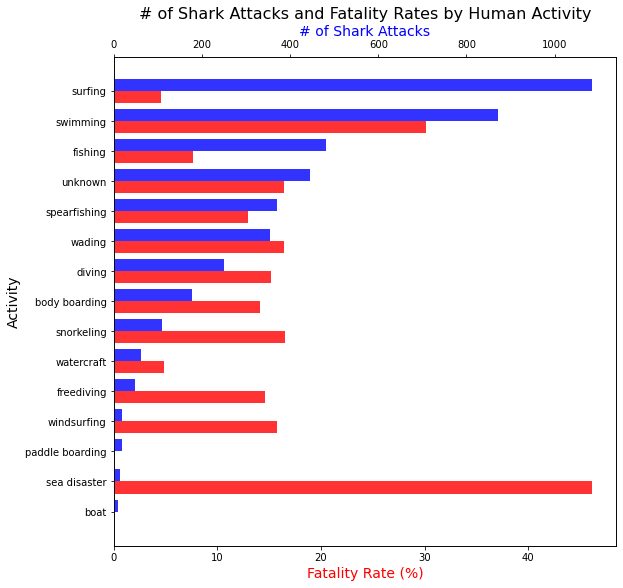

In [57]:
# Plot the number of shark attacks and fatality rate versus the human activity
fig,ax = plt.subplots(figsize=(9,9))
ax.barh(act_top15_h['Activity'], act_top15_h['Fatality Rate'],color="red", height=-0.4, alpha=0.8, align='edge')
ax.set_xlabel("Fatality Rate (%)",color="red",fontsize=14)
ax.set_ylabel("Activity",fontsize=14)
ax2=ax.twiny()
ax2.barh(act_top15_h['Activity'], act_top15_h['Count'], color="blue", height=0.4, alpha=0.8, align='edge')
ax2.set_xlabel("# of Shark Attacks",color="blue",fontsize=14)
plt.title('# of Shark Attacks and Fatality Rates by Human Activity', fontsize=16)
plt.show()

Surfing was the activity that shows the highest number of shark attacks worldwide, at ~19%, followed by swimming at ~15%. However, the highest fatality rate was the sea disaster activity, at ~46%, but the number of attacks for that activity was quite low (13, with 6 being fatal). Of the higher number of attacks (>50), swimming had the highest fatality rate (30%). 

### Summary and Future Efforts

The Global Shark Attack File dataset provided a good review of data cleaning, analysis and visualization. The disadvantage to this dataset was the sparse metadata available and a lack of detailed explanations of the information found in the dataset. Here is a quick rundown of the results of the analysis of shark attacks since 1900:

1. Type of attack - nearly 73% were unprovoked, with just under 10% were identified as being a provoked incident. In other words, the majority of shark attacks occur on unsuspecting humans.

2. Fatalities - worldwide, approximately 18% of the shark attacks were fatal. While the USA had the most recorded shark attacks, it also had the second lowest fatality rate (6%). Australia had the second most number of attacks, but its fatality rate matched that of the worldwide rate - 18%.

3. Shark species involved in the top 5 USA states with the most shark attacks - Of those species, the White Shark had the highest number of attacks (288) and the second highest fatality rate (23%). The Tiger Shark was second in number of attacks (169), but first in fatality rate (24%).

4. Human Activity - surfing was the most popular human activity documented in the dataset, with over 1000 occurrences. Conversely, the fatality rate for surfers was relatively low - 4.5%. Swimming was the second most common, and the fatality rate was the second highest - 30%. Therefore, surfers are more likely to get bit by a shark, but swimmers were much more likely to die from a shark attack

In [59]:
# Export cleaned GSAF dataset
gsaf.to_csv('/home/ken/my_datasets/GSAF/GSAF_cleaned_v2.csv', index=False)